In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
% cd My Drive/Work/Intern/AI/Project/Fruit-Regconition

/gdrive/My Drive/Work/Intern/AI/Project/Fruit-Regconition


In [0]:
! ls

data  feature.npy  image_origin.npy  label.npy


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [0]:

X_path = 'feature.npy'
X_path_origin = 'image_origin.npy'
y_path = 'label.npy'

X = np.load(X_path)
X_asli = np.load(X_path_origin)
y = np.load(y_path)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [0]:
print("Jumlah Data Training : ",np.shape(X_train)[0])
print("Jumlah Data Testing : ",np.shape(X_test)[0])

Jumlah Data Training :  11376
Jumlah Data Testing :  2845


In [0]:
model = Sequential()

model.add(Conv2D(64,3,activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(256,3,activation='relu'))
model.add(Conv2D(256,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(512,3,activation='relu'))
model.add(Conv2D(512,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(512,3,activation='relu'))
model.add(Conv2D(512,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(23,activation='softmax',name='predictions'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.33)

Train on 7621 samples, validate on 3755 samples
Epoch 1/10
7621/7621 [==============================] - 64s 8ms/step - loss: 3.2696 - acc: 0.3577 - val_loss: 8.0127 - val_acc: 0.1521
Epoch 2/10
7621/7621 [==============================] - 53s 7ms/step - loss: 1.1696 - acc: 0.6611 - val_loss: 9.3705 - val_acc: 0.1771
Epoch 3/10
7621/7621 [==============================] - 54s 7ms/step - loss: 0.5944 - acc: 0.8183 - val_loss: 3.6439 - val_acc: 0.4969
Epoch 4/10
7621/7621 [==============================] - 54s 7ms/step - loss: 0.2676 - acc: 0.9201 - val_loss: 1.0001 - val_acc: 0.8130
Epoch 5/10
7621/7621 [==============================] - 55s 7ms/step - loss: 0.2091 - acc: 0.9446 - val_loss: 1.9063 - val_acc: 0.6051
Epoch 6/10
7621/7621 [==============================] - 55s 7ms/step - loss: 0.1025 - acc: 0.9705 - val_loss: 0.6196 - val_acc: 0.8386
Epoch 7/10
7621/7621 [==============================] - 55s 7ms/step - loss: 0.0401 - acc: 0.9891 - val_loss: 0.2758 - val_acc: 0.9217
Epoch 8

In [0]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.2931392413503466
Test Accuracy: 0.9420035151689459


In [0]:
X_TraingbrAsli, X_TestgbrAsli, y_trainasli, y_testasli = train_test_split(X_asli, y, test_size=0.33,shuffle=False)

In [0]:
label = ["Apple", "Banana", "Blueberry", "Cherry", "Chestnut", "Kaki", "Kiwi", "Lemon", "Limes", "Lychee", "Mango", "Orange", "Papaya", "Pear", "Pepino", "Physalis", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Salak", "Strawberry", "Tomato"]

[20  4 22 19 11  7 12 20  4  4 22  1  0  1  1 13]


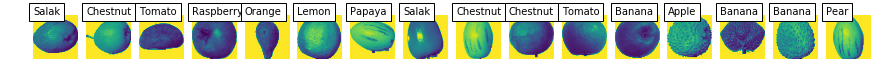

In [0]:
slice = 16
predicted = model.predict(X_test[:slice]).argmax(-1)
plt.figure(figsize=(15,8))
for i in range(slice):
  prd = label[predicted[i]]
  plt.subplot(1, slice, i+1)
  plt.imshow(X_TestgbrAsli[i], interpolation='nearest')
  plt.text(0, 0, prd, color='black', 
           bbox=dict(facecolor='white', alpha=1))
  plt.axis('off')
  
print(predicted)

In [0]:
model.save('Fruit_Regconition.h5')